In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [62]:
def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye(m))
    for j in range(m):
        diff = point - xmat[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights      

In [63]:
def localWeight(point, xmat, ymat, k):
    wei = kernel(point,xmat,k)
    W = np.linalg.inv(xmat.T @ (wei * xmat)) @ (xmat.T @ (wei * ymat.T))
    return W

In [64]:
def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

C:\Users\AYUSH\AppData\Local\Temp\ipykernel_7116\388399895.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
C:\Users\AYUSH\AppData\Local\Temp\ipykernel_7116\3030350563.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)


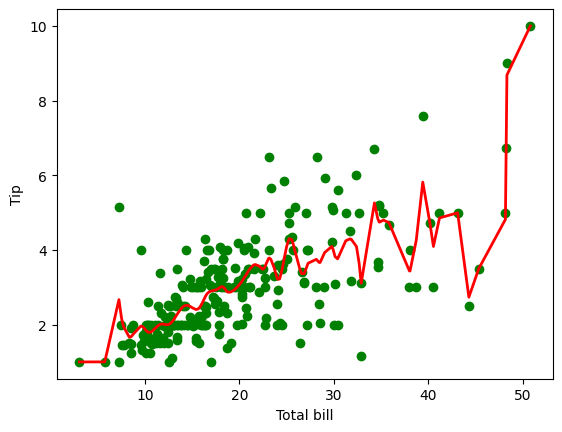

In [71]:
# load data points
data = pd.read_csv('10-dataset.csv')
bill = np.array(data['total_bill'])
tip = np.array(data['tip'])
 
#preparing and add 1 in bill
mbill = np.mat(bill)
mtip = np.mat(tip)

m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T))
#set k here
ypred = localWeightRegression(X,mtip,0.5)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]
# print(xsort)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='green')
ax.plot(xsort[:,1],ypred[SortIndex],color = 'red', linewidth=2)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

In [ ]:
np.sum